## PREDICTION OF MISSING WELL LOG USING MACHINE LEARNING AND PHYSICS INFORMED NEURAL NETWORK(PINN)

#### Olorunniyi Israel

Thisfinal year project looks to addres issues related to computing values of missing well log data , and also to get their respective values to aid proper reservoir characterization and also help in exploration 

The first step would be to import the libraries that would be required, These includes:
- pandas for loading and storing data
- matplotlib and seaborn for visualising the data
- numpy for a number of calculation methods
- sklern for building part of the model
- tensorflow for builiding the core model
- seaborn for visualizationation
- lasio for reading las files


In [4]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn
!pip install lasio

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^

   - ------------------------------------- 13.2/376.0 MB 377.1 kB/s eta 0:16:02
   - ------------------------------------- 13.3/376.0 MB 376.5 kB/s eta 0:16:04
   - ------------------------------------- 13.3/376.0 MB 380.9 kB/s eta 0:15:53
   - ------------------------------------- 13.4/376.0 MB 380.2 kB/s eta 0:15:54
   - ------------------------------------- 13.4/376.0 MB 380.0 kB/s eta 0:15:55
   - ------------------------------------- 13.4/376.0 MB 378.7 kB/s eta 0:15:58
   - ------------------------------------- 13.5/376.0 MB 378.0 kB/s eta 0:15:59
   - ------------------------------------- 13.5/376.0 MB 377.1 kB/s eta 0:16:01
   - ------------------------------------- 13.6/376.0 MB 376.3 kB/s eta 0:16:04
   - ------------------------------------- 13.6/376.0 MB 376.1 kB/s eta 0:16:04
   - ------------------------------------- 13.6/376.0 MB 376.1 kB/s eta 0:16:04
   - ------------------------------------- 13.6/376.0 MB 376.1 kB/s eta 0:16:04
   - -----------------------------------

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import lasio 


Next step is to read in the well data, and load them up

In [7]:
path ={}

In [8]:
las = lasio.read ('Project_well_logs/TMG-1-logs.las')

Next is to list all available logs in the well

In [10]:
las.keys()

['DEPT',
 'NPHI_ED',
 'CALI',
 'PHIE:1',
 'NEUT',
 'SP:1',
 'SWE',
 'RES',
 'RHOB:1',
 'VSH',
 'PHIE:2',
 'GR',
 'SP:2',
 'RHOB:2']

In [11]:
df = las.df()
df.reset_index(inplace= True)

Converted the las file into a data frame(df) to enable us view diffrent sections of the data

In [13]:
df.head() 

,DEPT,NPHI_ED,CALI,PHIE:1,NEUT,SP:1,SWE,RES,RHOB:1,VSH,PHIE:2,GR,SP:2,RHOB:2
0,2915.0,0.7,16.85,0.256,0.0,0.0,1.0,1.28,2.059,0.995000,0.256,69.65,0.0,2.059
1,2916.0,0.7,15.88,0.282,0.0,0.0,1.0,1.27,2.036,0.960571,0.282,67.24,0.0,2.036
2,2917.0,0.7,16.80,0.266,0.0,0.0,1.0,1.27,2.073,0.941143,0.266,65.88,0.0,2.073
3,2918.0,0.7,16.87,0.261,0.0,0.0,1.0,1.27,2.072,0.961143,0.261,67.28,0.0,2.072
4,2919.0,0.7,16.85,0.268,0.0,0.0,1.0,1.27,2.042,0.990000,0.268,69.30,0.0,2.042


To proceed further we use the .info() function to get an overview of the data present, null values and the type of properties present in the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPT     8339 non-null   float64
 1   NPHI_ED  8338 non-null   float64
 2   CALI     8339 non-null   float64
 3   PHIE:1   8338 non-null   float64
 4   NEUT     8339 non-null   float64
 5   SP:1     8339 non-null   float64
 6   SWE      8339 non-null   float64
 7   RES      8339 non-null   float64
 8   RHOB:1   8339 non-null   float64
 9   VSH      8339 non-null   float64
 10  PHIE:2   8338 non-null   float64
 11  GR       8339 non-null   float64
 12  SP:2     8339 non-null   float64
 13  RHOB:2   8339 non-null   float64
dtypes: float64(14)
memory usage: 912.2 KB


## DATA CLEANING AND VISULIZATION

First check for logs with large null values, proceed with dropping them and cleaning the data

In [18]:
df.isnull().sum()

DEPT       0
NPHI_ED    1
CALI       0
PHIE:1     1
NEUT       0
SP:1       0
SWE        0
RES        0
RHOB:1     0
VSH        0
PHIE:2     1
GR         0
SP:2       0
RHOB:2     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPT     8339 non-null   float64
 1   NPHI_ED  8338 non-null   float64
 2   CALI     8339 non-null   float64
 3   PHIE:1   8338 non-null   float64
 4   NEUT     8339 non-null   float64
 5   SP:1     8339 non-null   float64
 6   SWE      8339 non-null   float64
 7   RES      8339 non-null   float64
 8   RHOB:1   8339 non-null   float64
 9   VSH      8339 non-null   float64
 10  PHIE:2   8338 non-null   float64
 11  GR       8339 non-null   float64
 12  SP:2     8339 non-null   float64
 13  RHOB:2   8339 non-null   float64
dtypes: float64(14)
memory usage: 912.2 KB


Next we use the head and tail function to give us an overview of the values in top and bottom five coloums of the data set respectively

In [21]:
df.head()

,DEPT,NPHI_ED,CALI,PHIE:1,NEUT,SP:1,SWE,RES,RHOB:1,VSH,PHIE:2,GR,SP:2,RHOB:2
0,2915.0,0.7,16.85,0.256,0.0,0.0,1.0,1.28,2.059,0.995000,0.256,69.65,0.0,2.059
1,2916.0,0.7,15.88,0.282,0.0,0.0,1.0,1.27,2.036,0.960571,0.282,67.24,0.0,2.036
2,2917.0,0.7,16.80,0.266,0.0,0.0,1.0,1.27,2.073,0.941143,0.266,65.88,0.0,2.073
3,2918.0,0.7,16.87,0.261,0.0,0.0,1.0,1.27,2.072,0.961143,0.261,67.28,0.0,2.072
4,2919.0,0.7,16.85,0.268,0.0,0.0,1.0,1.27,2.042,0.990000,0.268,69.30,0.0,2.042


In [22]:
df.tail()

,DEPT,NPHI_ED,CALI,PHIE:1,NEUT,SP:1,SWE,RES,RHOB:1,VSH,PHIE:2,GR,SP:2,RHOB:2
8334,11249.0,0.282,0.0,0.558,90.0,0.0,1.0,1.98,0.0,0.935647,0.558,79.53,0.0,0.0
8335,11250.0,0.276,0.0,0.552,4.3,0.0,1.0,1.91,0.0,0.944471,0.552,80.28,0.0,0.0
8336,11251.0,0.264,0.0,0.555,33.3,0.0,1.0,1.85,0.0,0.935059,0.555,79.48,0.0,0.0
8337,11252.0,0.249,0.0,0.559,70.7,0.0,1.0,1.83,0.0,0.927412,0.559,78.83,0.0,0.0
8338,11253.0,0.239,0.0,0.563,96.0,0.0,1.0,1.91,0.0,0.920706,0.563,78.26,0.0,0.0


### Well LOG PLOT

From the sorted data we can see a trend of zero values in some loggs, therfore we would be plotting to properly visualize the well logs

This `well_plot` function will take the following number of arguments (inputs):
- **wellname**: the wellname as a string
- **dataframe**: the dataframe for the selected well
- **curves_to_plot**: a list of logging curves / dataframe columns we are wanting to plot
- **depth_curve**: the the depth curve we are wanting to plot against
- **log_curves**: a list of curves that need to be displayed on a logarithmic scale


In [26]:
def well_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[]):
    num_tracks = len(curves_to_plot)
  
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))

    fig.suptitle(wellname, fontsize=20, y=1.05)

    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)

        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        ax[i].set_ylim(depth_curve.max(), depth_curve.min())

        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)

        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
    
    plt.tight_layout()
    plt.show()

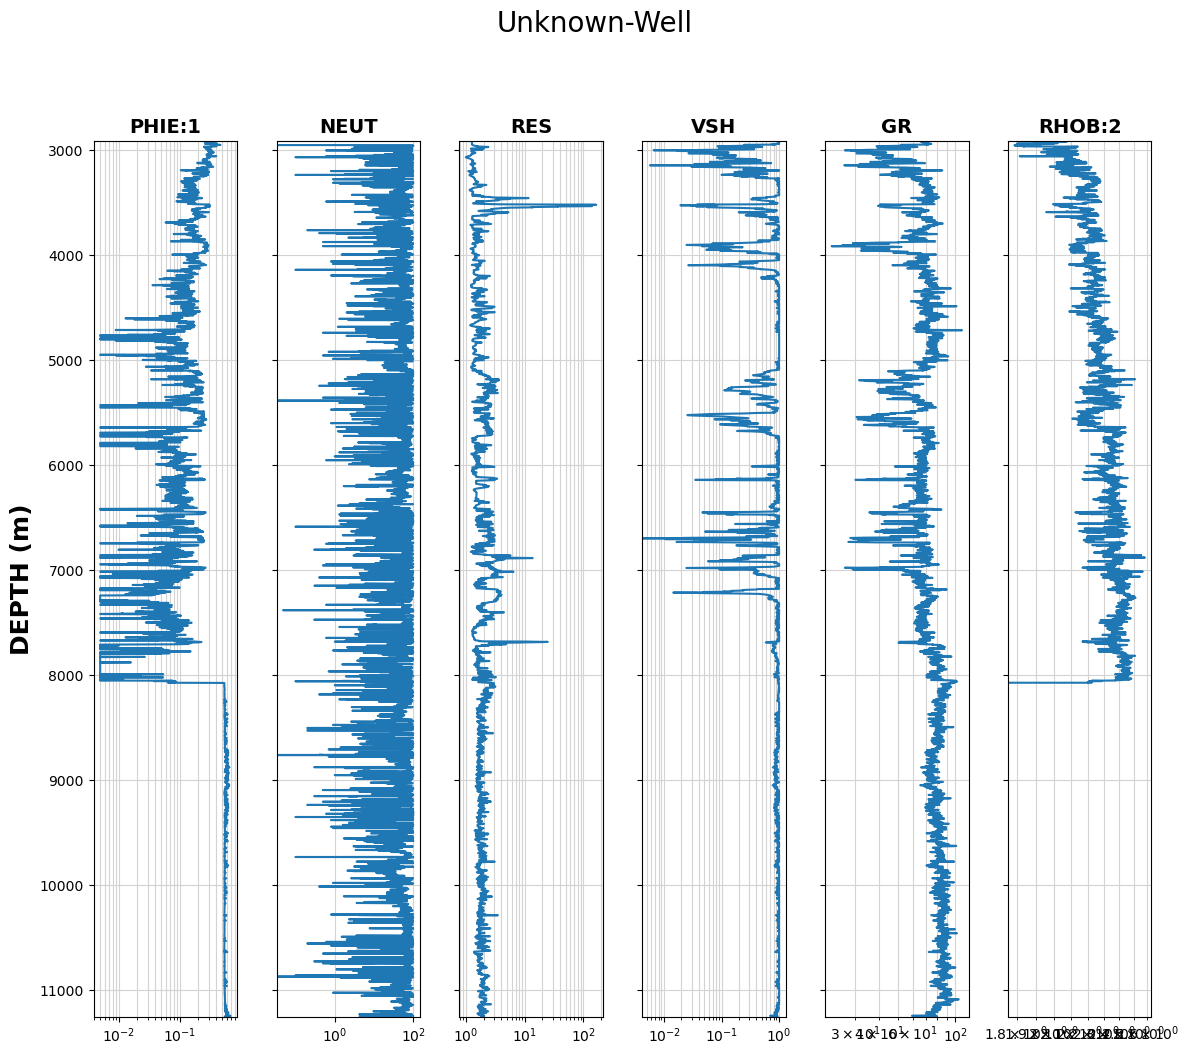

In [27]:
curves_to_plot = ['PHIE:1','NEUT','RES','VSH','GR','RHOB:2']
logarithmic_curves = ['PHIE:1','NEUT','RES','VSH','GR','RHOB:2']
dept = df['DEPT']
well_plot("Unknown-Well", df, curves_to_plot, dept, logarithmic_curves)

### Attending to outliers

### CREATING MODEL USING CONVOLUTIONAL NEAURAL NETWORK